#  unixial symmetry analysis

#### Notes (mostly to myself):

<ul>
  <li>The algebra done here are all for d=3 but can easily be implemented to d=2 if needed. One can check via the overleaf doc if it agrees with calculoations done there often I shall do it.</li>
  <li>Im going to be picking explicit vectors <strong>n</strong>,<strong>m</strong>  as this dosent change of any of the calculations as we work with scalars (hence wlog)</li>
  <li>References: I shall try my best to provide a source/references to any "statments" of stability but feel free to ask about things</li>
</ul>

## 1. Algebra check

In [62]:
import sympy as sp
from sympy import pretty_print
##preliminaries wlog we may choose vectors n and m to be [1,0,0] and [0,1,0]
psi1, psi2 = sp.symbols('psi1 psi2', complex=True)
n_vec = sp.Matrix([1,0,0])
m_vec = sp.Matrix([0,1,0])
d = 3    

# E_{ij} tensor
E = psi1*(n_vec*n_vec.T - sp.eye(3)/d) + psi2*(m_vec*m_vec.T - sp.eye(3)/d)
pretty_print(E)
#just testing symbolic computations & derivation first bul term
S = sum(E[i,j] * sp.conjugate(E[i,j]) for i in range(3) for j in range(3))
pretty_print(S)

psi1c, psi2c = sp.symbols('psi1c psi2c', complex=True)
S_sub = sp.expand(S).subs({sp.conjugate(psi1): psi1c, sp.conjugate(psi2): psi2c})
dS_sub = sp.diff(S_sub, psi1c)
result = sp.simplify(dS_sub)
pretty_print(result)  # outputs 2*psi1 + psi2

⎡2⋅ψ₁   ψ₂                        ⎤
⎢──── - ──       0           0    ⎥
⎢ 3     3                         ⎥
⎢                                 ⎥
⎢             ψ₁   2⋅ψ₂           ⎥
⎢    0      - ── + ────      0    ⎥
⎢             3     3             ⎥
⎢                                 ⎥
⎢                          ψ₁   ψ₂⎥
⎢    0           0       - ── - ──⎥
⎣                          3    3 ⎦
            ⎛  __   __⎞                 ⎛  __     __⎞               ⎛  __   __
⎛  ψ₁   ψ₂⎞ ⎜  ψ₁   ψ₂⎟   ⎛  ψ₁   2⋅ψ₂⎞ ⎜  ψ₁   2⋅ψ₂⎟   ⎛2⋅ψ₁   ψ₂⎞ ⎜2⋅ψ₁   ψ₂
⎜- ── - ──⎟⋅⎜- ── - ──⎟ + ⎜- ── + ────⎟⋅⎜- ── + ────⎟ + ⎜──── - ──⎟⋅⎜──── - ──
⎝  3    3 ⎠ ⎝  3    3 ⎠   ⎝  3     3  ⎠ ⎝  3     3  ⎠   ⎝ 3     3 ⎠ ⎝ 3     3 

⎞
⎟
⎟
⎠
2⋅ψ₁   ψ₂
──── - ──
 3     3 


### Calculating the $F_{bulk}$ symbolically in terms of $\psi_{i}$'s :

In [63]:
##Original A and C terms in the bulk
A, C , D= sp.symbols('A C D', real=True)
A1 = sum(E[i,j] * sp.conjugate(E[i,j]) for i in range(3) for j in range(3))
C1 = A1 * A1
C2 = sum(
    E[i, k] * sp.conjugate(E[k, j]) *
    E[j, l] * sp.conjugate(E[l, i])
    for i in range(3)
    for k in range(3)
    for j in range(3)
    for l in range(3)
)
Fbulk = A * A1 /2 + C * C1 /4 + D * C2 /4
F_sub = sp.expand(Fbulk).subs({sp.conjugate(psi1): psi1c, sp.conjugate(psi2): psi2c})
F_diff = sp.diff(F_sub, psi1c)
result1 = sp.simplify(F_diff)
sp.simplify(result1)
fsimp= sp.expand(result1).subs({psi2:0 , psi2c: 0,psi1c: sp.conjugate(psi1)})
sp.expand(fsimp)



A*psi1/3 + 2*C*psi1**2*conjugate(psi1)/9 + D*psi1**2*conjugate(psi1)/9

#### $A$ term /  $E_{ij}E^{*}_{ij}$ :

In [64]:
sp.expand(A1)

2*psi1*conjugate(psi1)/3 - psi1*conjugate(psi2)/3 - psi2*conjugate(psi1)/3 + 2*psi2*conjugate(psi2)/3

#### $C$ term / $(E_{ij}E^{*}_{ij})^{2}$ :

In [65]:
sp.expand(C1)

4*psi1**2*conjugate(psi1)**2/9 - 4*psi1**2*conjugate(psi1)*conjugate(psi2)/9 + psi1**2*conjugate(psi2)**2/9 - 4*psi1*psi2*conjugate(psi1)**2/9 + 10*psi1*psi2*conjugate(psi1)*conjugate(psi2)/9 - 4*psi1*psi2*conjugate(psi2)**2/9 + psi2**2*conjugate(psi1)**2/9 - 4*psi2**2*conjugate(psi1)*conjugate(psi2)/9 + 4*psi2**2*conjugate(psi2)**2/9

#### $\tilde{C}$ term (to avoid confusion $\tilde{C} \rightarrow D$) / $E_{ij}E_{jk}E^{*}_{km}E^{*}_{mi}$:

In [66]:
sp.expand(C2)

2*psi1**2*conjugate(psi1)**2/9 - 2*psi1**2*conjugate(psi1)*conjugate(psi2)/9 + psi1**2*conjugate(psi2)**2/9 - 2*psi1*psi2*conjugate(psi1)**2/9 + 4*psi1*psi2*conjugate(psi1)*conjugate(psi2)/9 - 2*psi1*psi2*conjugate(psi2)**2/9 + psi2**2*conjugate(psi1)**2/9 - 2*psi2**2*conjugate(psi1)*conjugate(psi2)/9 + 2*psi2**2*conjugate(psi2)**2/9

Thus the bulk in terms of $\psi_{i}'$'s is given by 

In [67]:
sp.expand(Fbulk)

A*psi1*conjugate(psi1)/3 - A*psi1*conjugate(psi2)/6 - A*psi2*conjugate(psi1)/6 + A*psi2*conjugate(psi2)/3 + C*psi1**2*conjugate(psi1)**2/9 - C*psi1**2*conjugate(psi1)*conjugate(psi2)/9 + C*psi1**2*conjugate(psi2)**2/36 - C*psi1*psi2*conjugate(psi1)**2/9 + 5*C*psi1*psi2*conjugate(psi1)*conjugate(psi2)/18 - C*psi1*psi2*conjugate(psi2)**2/9 + C*psi2**2*conjugate(psi1)**2/36 - C*psi2**2*conjugate(psi1)*conjugate(psi2)/9 + C*psi2**2*conjugate(psi2)**2/9 + D*psi1**2*conjugate(psi1)**2/18 - D*psi1**2*conjugate(psi1)*conjugate(psi2)/18 + D*psi1**2*conjugate(psi2)**2/36 - D*psi1*psi2*conjugate(psi1)**2/18 + D*psi1*psi2*conjugate(psi1)*conjugate(psi2)/9 - D*psi1*psi2*conjugate(psi2)**2/18 + D*psi2**2*conjugate(psi1)**2/36 - D*psi2**2*conjugate(psi1)*conjugate(psi2)/18 + D*psi2**2*conjugate(psi2)**2/18

where to be precise with pre factors used:
$$F_{bulk} = \cfrac{A}{2}E_{ij}E^{*}_{ij}+\cfrac{C}{4}(E_{ij}E^{*}_{ij})^{2}+\cfrac{D}{4}E_{ij}E^{*}_{jk}E_{kl}E^{*}_{li}.$$

## 2. Finding fixed points of dynamics

Recall the equation of interest for the non-equillibiurm dynamics was given by
$$ \cfrac{\partial E_{ij}}{\partial t} = - \mu \cfrac{\delta F}{\delta E^{*}_{ij}} $$
For now we are interested in $F_{bulk}$ term which only depends only on $E_{ij}$ and not $E_{ij,k}$ but I assume the analysis could be easily generalised to account for the full free energy density (i.e $F = F_{bulk}+F_{comp}+F_{curv}$), Since $F(\underline{\underline{E}})$  we may use the Euler lagrange approach for functional derivatives to get

$$ \cfrac{\partial E_{ij}}{\partial t} = - \mu \cfrac{\partial F}{\partial E^{*}_{ij}} .$$

Our interest primarily lie in fixed points or rather minima's as these represent the equillibrium points in the phase transition hence we look at when $\cfrac{\partial F}{\partial E^{*}_{ij}} = 0$, however it will prove to be cumborsome to work with tensorial expressions and we rather look at terms that displays biaxial/uniaxial symmetry clearly, hence we shall re express the generalised velocity field via a chain rule i.e

$$ \cfrac{\partial F}{\partial E^{*}_{ij}} = \cfrac{\partial F}{\partial \psi^{*}_{1}} \cfrac{\partial \psi^{*}_{1}}{\partial E^{*}_{ij}} + \cfrac{\partial F}{\partial \psi^{*}_{2}} \cfrac{\partial \psi^{*}_{2}}{\partial E^{*}_{ij}}$$
Thus requiring $\cfrac{\partial F}{\partial E^{*}_{ij}} = 0$ will be equaivalent to requiring
$$\cfrac{\partial F}{\partial \psi^{*}_{2}}  = 0 = \cfrac{\partial F}{\partial \psi^{*}_{1}} $$

Clearly are primary focus shall be when $\psi_{2} =0 \ \textbf{and} \ \psi_{1} \neq 0$ (there's no special restriction that it must be $\psi_{1}$ or $\psi_{2}$ we may just as well swap the condition if needed). We shall later come back to focus on when $ \psi_{2} , \psi_{1} \neq 0$ as this represent equillibrias that are biaxial and it may be beneficial to look at what configurations favours biaxial solutions.

<strong>Remark</strong>: we may concern ourselves with the lagrange multipliers terms too but at the moment theres no reason to believe this contributes to the biaxial symmetry.

### looking at uniaxial equillibirum points:

### Expression for $\frac{\partial F}{\partial \psi^{*}_{1}}$ (evaluated at $\psi_{2} = 0$):

In [68]:
F_diff = sp.diff(F_sub, psi1c)
result1 = sp.simplify(F_diff).subs({psi2:0,psi2c: 0,psi1c: sp.conjugate(psi1)})
sp.expand(result1)

A*psi1/3 + 2*C*psi1**2*conjugate(psi1)/9 + D*psi1**2*conjugate(psi1)/9

### Expression for $\frac{\partial F}{\partial \psi^{*}_{2}}$ (evaluated at $\psi_{2} = 0$)

In [69]:
F_diff2 = sp.diff(F_sub, psi2c)
result3 = sp.simplify(F_diff2).subs({psi2:0,psi2c: 0,psi1c: sp.conjugate(psi1)})
sp.expand(result3)

-A*psi1/6 - C*psi1**2*conjugate(psi1)/9 - D*psi1**2*conjugate(psi1)/18

Here we need only find the solution of $|\psi_{1}|$ for $\frac{\partial F}{\partial \psi^{*}_{1}} = 0$ as $\frac{\partial F}{\partial \psi^{*}_{2}} = 0$ is just the same constraint multilpied by $-2$ (some what fortunately). Now  its easy to see uniaxial equillibria are at 
$$|\psi_{1}|= \sqrt{\cfrac{-3A}{2B+D}}.$$

So the the fixed point associated to $\cfrac{\delta F_{bulk}}{\delta \psi^{*}_{1}}|_{\psi_{2}=0}=0$ is given by $|\psi_{1}|= \sqrt{\cfrac{-3A}{2B+D}}$. We may now proceed with analysing the stability of said equillibria and to do so we shall introduce the <em>hessian</em>

<strong>Remark</strong> :This ultimately come's with a few constaints on $A,B,D$ for example if $A<0 \implies 2B+D > 0$ 

## 3. Stability of fixed points

<strong>A cautionary tale</strong>: I had intially taught that a <em>complex Hessian</em> would give what we intended for i.e determine minmias and maximas and saddles but saddly it turns out to <strong>not</strong> be true in general, it turns out the "complex hessian" tends to be only half of the real hessian and is used to identify plurisubharmonic functions, I found this  counter example to maybe see why this would be the case:

Consider the following function $f(z) = x^{2}-y^{2} = \cfrac{z^{2}+z^{* 2}}{2}$ , one may always see $\mathbb{C} \cong \mathbb{R}^{2}$ as follows $z=x+iy$ thus we may consider the real hessian of the function $f:\mathbb{R}^{2} \rightarrow \mathbb{R}$,

$$ H = \begin{bmatrix}
 f_{xx} & f_{xy}\\
          f_{yx} & f_{yy}
\end{bmatrix}  = \begin{bmatrix}
          2 & 0\\
          0 & -2
        \end{bmatrix}, $$
which gives us that $f$ has a saddle point at $z=0$ <strong>but</strong> if we had considered the complex hessian 
$$ H = \cfrac{\partial^{2}f}{\partial z^{*}\partial z} = 0$$
which is inconclusive thus it serves us better to consider the real hessian instead to avoid mistakes. However I think I've found the full <em>real Hessian</em> in terms of $z$ and $z^{*}$ just to continue the above example
$$ H = \begin{bmatrix}
 f_{zz^{*}} & f_{z^{*}z^{*}}\\
          f_{zz} & f_{z^{*}z}
\end{bmatrix}  = \begin{bmatrix}
          0 & 1\\
          1 & 0
        \end{bmatrix}, $$
which has eigen values $\pm 1$, thus $f$ has a saddle point as expected!

edit: This is what confirmed suspiscions cause I got too simple results intially https://math.stackexchange.com/questions/2015771/hessian-for-complex (specifically the second answer), I think I found something useful instead of the procedure turning everything into real variables, I did a bit of reading of the following books which I fould useful: https://www.cambridge.org/core/books/complexvalued-matrix-derivatives/background-material/0EDF69272882D0485AEFB033831212E2 (chapter 5 is the useful one but bewarned the notation is dense and they look at it in general for matrix valued functions so a bit overkill) ,  https://www.jirka.org/scv/scv.pdf (specifically page 67; I will attach a derivation to see how there related at the end of the notebook)

Lets define the complex <em>complex hessian</em> of the function $F: \mathbb{C^{2}} \rightarrow \mathbb{R} \subset \mathbb{C}$ as follows
$$
H = \begin{bmatrix}
\cfrac{\partial^{2}F}{\partial{\psi^{*}_{1}}\partial{\psi_{1}}} & \cfrac{\partial^{2}F}{\partial{\psi^{*}_{2}}\partial{\psi_{1}}}\\
\cfrac{\partial^{2}F}{\partial{\psi^{*}_{1}}\partial{\psi_{2}}} & \cfrac{\partial^{2}F}{\partial{\psi^{*}_{2}}\partial{\psi_{2}}}
\end{bmatrix}
$$	
or in index notation $H_{ij}=\cfrac{\partial^{2}F}{\partial{\psi^{*}_{i}}\partial \psi_{j}}$. More importantly the <em>real hessian</em> for $F$ is defined as follows
$$ H = \begin{bmatrix}
\cfrac{\partial^{2}F}{\partial{\psi^{*}_{1}}\partial{\psi_{1}}} & \cfrac{\partial^{2}F}{\partial{\psi^{*}_{2}}\partial{\psi_{1}}} &  \cfrac{\partial^{2}F}{\partial{\psi^{*}_{1}}\partial{\psi^{*}_{1}}} & \cfrac{\partial^{2}F}{\partial{\psi^{*}_{2}}\partial{\psi^{*}_{1}}} \\
\cfrac{\partial^{2}F}{\partial{\psi^{*}_{1}}\partial{\psi_{2}}} & \cfrac{\partial^{2}F}{\partial{\psi^{*}_{2}}\partial{\psi_{2}}} & \cfrac{\partial^{2}F}{\partial{\psi^{*}_{1}}\partial{\psi^{*}_{2}}} & \cfrac{\partial^{2}F}{\partial{\psi^{*}_{2}}\partial{\psi^{*}_{2}}} \\ \cfrac{\partial^{2}F}{\partial{\psi_{1}}\partial{\psi_{1}}} & \cfrac{\partial^{2}F}{\partial{\psi_{2}}\partial{\psi_{1}}} &  \cfrac{\partial^{2}F}{\partial{\psi_{1}}\partial{\psi^{*}_{1}}} & \cfrac{\partial^{2}F}{\partial{\psi_{2}}\partial{\psi^{*}_{1}}} \\
\cfrac{\partial^{2}F}{\partial{\psi_{1}}\partial{\psi_{2}}} & \cfrac{\partial^{2}F}{\partial{\psi_{2}}\partial{\psi_{2}}} & \cfrac{\partial^{2}F}{\partial{\psi_{1}}\partial{\psi^{*}_{2}}} & \cfrac{\partial^{2}F}{\partial{\psi_{2}}\partial{\psi^{*}_{2}}} 
\end{bmatrix}$$

page 102 chapter 5 (5.25) of https://www.cambridge.org/core/books/complexvalued-matrix-derivatives/background-material/


or alternatively page 67 https://www.cambridge.org/core/books/complexvalued-matrix-derivatives/background-material/ 

<strong>Remark</strong>: Sylvester’s law of inertia from linear
algebra says star-congruence preserves the inertia (the number of positive, negative, and
zero eigenvalues). So the inertia of the full Hessian in terms of $x$'s and $y$'s is the same
as for the full Hessian in terms of $z$'s and $z^{*}$'s. 



In [70]:
##Computing the complex hessian
H1i = sp.diff(F_sub, psi1c)
H2i = sp.diff(F_sub, psi2c)
H11 = sp.diff(H1i,psi1)
H12 = sp.diff(H1i,psi2)
H21 = sp.diff(H2i,psi1)
H22 = sp.diff(H2i,psi2)
H = sp.Matrix([
  [H11, H12],
  [H21, H22]
])
sp.simplify(H).subs({ psi1c: sp.conjugate(psi1), psi2c: sp.conjugate(psi2) })




Matrix([
[A/3 + 4*C*psi1*conjugate(psi1)/9 - 2*C*psi1*conjugate(psi2)/9 - 2*C*psi2*conjugate(psi1)/9 + 5*C*psi2*conjugate(psi2)/18 + 2*D*psi1*conjugate(psi1)/9 - D*psi1*conjugate(psi2)/9 - D*psi2*conjugate(psi1)/9 + D*psi2*conjugate(psi2)/9,    -A/6 - 2*C*psi1*conjugate(psi1)/9 + 5*C*psi1*conjugate(psi2)/18 + C*psi2*conjugate(psi1)/9 - 2*C*psi2*conjugate(psi2)/9 - D*psi1*conjugate(psi1)/9 + D*psi1*conjugate(psi2)/9 + D*psi2*conjugate(psi1)/9 - D*psi2*conjugate(psi2)/9],
[   -A/6 - 2*C*psi1*conjugate(psi1)/9 + C*psi1*conjugate(psi2)/9 + 5*C*psi2*conjugate(psi1)/18 - 2*C*psi2*conjugate(psi2)/9 - D*psi1*conjugate(psi1)/9 + D*psi1*conjugate(psi2)/9 + D*psi2*conjugate(psi1)/9 - D*psi2*conjugate(psi2)/9, A/3 + 5*C*psi1*conjugate(psi1)/18 - 2*C*psi1*conjugate(psi2)/9 - 2*C*psi2*conjugate(psi1)/9 + 4*C*psi2*conjugate(psi2)/9 + D*psi1*conjugate(psi1)/9 - D*psi1*conjugate(psi2)/9 - D*psi2*conjugate(psi1)/9 + 2*D*psi2*conjugate(psi2)/9]])

In [86]:
# Specify the row and column ordering you want to match the block pattern:
# rows: (psi1, psi1*, psi2, psi2*)
row_vars = [psi1, psi1c, psi2, psi2c]
# columns: (psi1*, psi1, psi2*, psi2)
col_vars = [psi1c, psi1, psi2c, psi2]

# Build the full 4x4 Hessian with separate row/column ordering
H_full = sp.Matrix([[sp.diff(F_sub, rv, cv) for cv in col_vars] for rv in row_vars])

# Simplify and substitute conjugate placeholders
H_full_simpl = sp.simplify(H_full).subs({
    psi1c: sp.conjugate(psi1),
    psi2c: sp.conjugate(psi2)
})

# H_full_simpl is the 4x4 Hessian with your desired block ordering
H_full_simpl.subs({ psi1c: sp.conjugate(psi1), psi2c: 0 ,psi2: 0})


Matrix([
[A/3 + 4*C*psi1*conjugate(psi1)/9 + 2*D*psi1*conjugate(psi1)/9,             2*C*conjugate(psi1)**2/9 + D*conjugate(psi1)**2/9, -A/6 - 2*C*psi1*conjugate(psi1)/9 - D*psi1*conjugate(psi1)/9,            -C*conjugate(psi1)**2/9 - D*conjugate(psi1)**2/18],
[                                  2*C*psi1**2/9 + D*psi1**2/9, A/3 + 4*C*psi1*conjugate(psi1)/9 + 2*D*psi1*conjugate(psi1)/9,                                  -C*psi1**2/9 - D*psi1**2/18, -A/6 - 2*C*psi1*conjugate(psi1)/9 - D*psi1*conjugate(psi1)/9],
[ -A/6 - 2*C*psi1*conjugate(psi1)/9 - D*psi1*conjugate(psi1)/9,             -C*conjugate(psi1)**2/9 - D*conjugate(psi1)**2/18, A/3 + 5*C*psi1*conjugate(psi1)/18 + D*psi1*conjugate(psi1)/9,            C*conjugate(psi1)**2/18 + D*conjugate(psi1)**2/18],
[                                  -C*psi1**2/9 - D*psi1**2/18,  -A/6 - 2*C*psi1*conjugate(psi1)/9 - D*psi1*conjugate(psi1)/9,                                  C*psi1**2/18 + D*psi1**2/18, A/3 + 5*C*psi1*conjugate(psi1)/18 + D*psi1*con

In [71]:
##evaluated at psi2 = 0
Hstar = sp.simplify(H).subs({ psi1c: sp.conjugate(psi1), psi2c: 0 ,psi2: 0})
sp.simplify(Hstar)

Matrix([
[A/3 + 4*C*psi1*conjugate(psi1)/9 + 2*D*psi1*conjugate(psi1)/9, -A/6 - 2*C*psi1*conjugate(psi1)/9 - D*psi1*conjugate(psi1)/9],
[ -A/6 - 2*C*psi1*conjugate(psi1)/9 - D*psi1*conjugate(psi1)/9, A/3 + 5*C*psi1*conjugate(psi1)/18 + D*psi1*conjugate(psi1)/9]])

In [72]:
##determinant of the hessian
Hstar.det()

A**2/12 + A*C*psi1*conjugate(psi1)/6 + 2*A*D*psi1*conjugate(psi1)/27 + 2*C**2*psi1**2*conjugate(psi1)**2/27 + 5*C*D*psi1**2*conjugate(psi1)**2/81 + D**2*psi1**2*conjugate(psi1)**2/81

In [73]:
## Hessian evaluated at f.p.
r=sp.sqrt(3*A/(2*C+D))
H_eval=Hstar.subs({psi1:-1*r,sp.conjugate(psi1):r})
sp.simplify(H_eval)

Matrix([
[-A/3,               A/6],
[ A/6, -A*C/(12*C + 6*D)]])

In [74]:
r=sp.sqrt(3*A/(2*C+D))
Hdet = Hstar.det().subs({psi1:-1*r,sp.conjugate(psi1):r})
sp.simplify(Hdet)


-A**2*D/(72*C + 36*D)

In [75]:
H_sub = Hstar.subs({psi1: -r, sp.conjugate(psi1): r})
eigs = H_sub.eigenvals() 
eigs_simpl = { sp.simplify(ev): m for ev, m in eigs.items() }

sp.simplify(eigs_simpl) 

{A*(-5*C - 2*D - sqrt(25*C**2 + 28*C*D + 8*D**2))/(12*(2*C + D)): 1, A*(-5*C - 2*D + sqrt(25*C**2 + 28*C*D + 8*D**2))/(12*(2*C + D)): 1}

Thus the determinant of the Hessian is given by
$$\text{det}(H) = \cfrac{-AD^{2}}{74C + 36D}$$

In [76]:
expr = (
      (A*A)/12
    + (A*C)/6      * (-3*A/(2*C + D))
    + 2*(A*D)/27   * (-3*A/(2*C + D))
    + (2*C**2)/27     * (-3*A/(2*C + D))**2
    + (5*C*D)/81   * (-3*A/(2*C + D))**2
    + (D**2)/81    * (-3*A/(2*C + D))**2
)

sp.simplify(expr)

-A**2*D/(72*C + 36*D)

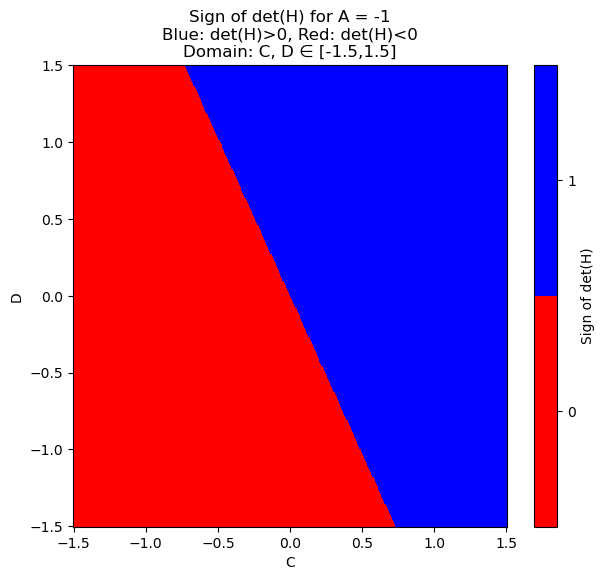

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Parameters
A = -1
C_vals = np.linspace(-1.5, 1.5, 400)
D_vals = np.linspace(-1.5, 1.5, 400)
C, D = np.meshgrid(C_vals, D_vals)

# Compute determinant det(H) = -A * D^2 / (74*C + 36*D)
denominator = 74 * C + 36 * D
detH = np.full_like(C, np.nan, dtype=float)
valid = np.abs(denominator) > 1e-6
detH[valid] = -A * D[valid]**2 / denominator[valid]

# Create mask: 1 if detH>0, 0 if detH<0
mask = np.zeros_like(detH, dtype=int)
mask[detH > 0] = 1

# Define two-color map: red for 0, blue for 1
cmap = ListedColormap(['red', 'blue'])

# Plot
plt.figure(figsize=(7,6))
plt.pcolormesh(C, D, mask, cmap=cmap, shading='auto')
plt.colorbar(ticks=[0,1], label='Sign of det(H)')
plt.clim(-0.5, 1.5)
plt.xlabel('C')
plt.ylabel('D')
plt.title('Sign of det(H) for A = -1\nBlue: det(H)>0, Red: det(H)<0\nDomain: C, D ∈ [-1.5,1.5]')
plt.show()

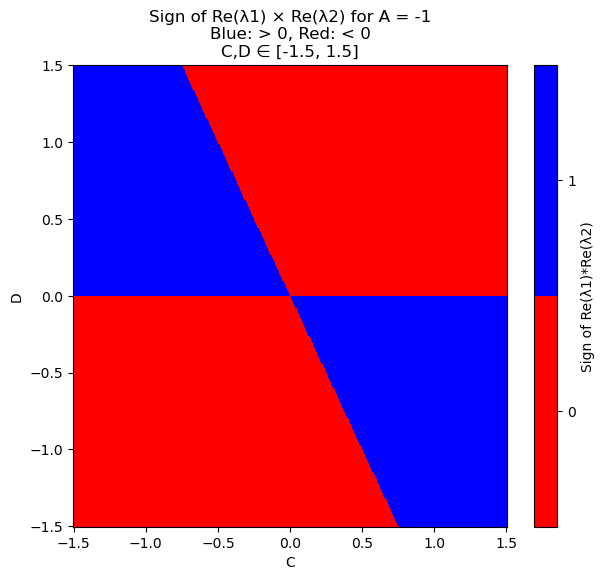

In [78]:
# Fixed parameter
A = -1

# Grid for C and D
C_vals = np.linspace(-1.5, 1.5, 400)
D_vals = np.linspace(-1.5, 1.5, 400)
C, D = np.meshgrid(C_vals, D_vals)

# Avoid singularity where denominator is zero
den = 12 * (2*C + D)
valid = np.abs(den) > 1e-6

# Compute the discriminant inside the square root
disc = 25*C**2 + 28*C*D + 8*D**2
sqrt_disc = np.sqrt(disc)

# Compute the two eigenvalues λ1 and λ2
num1 = A * (-5*C - 2*D - sqrt_disc)
num2 = A * (-5*C - 2*D + sqrt_disc)
lambda1 = np.zeros_like(C, dtype=complex)
lambda2 = np.zeros_like(C, dtype=complex)
lambda1[valid] = num1[valid] / den[valid]
lambda2[valid] = num2[valid] / den[valid]

# Compute the product of their real parts
prod_real = np.real(lambda1) * np.real(lambda2)

# Create a mask: 1 if positive, 0 if negative or zero
mask = np.zeros_like(prod_real, dtype=int)
mask[prod_real > 0] = 1

# Define a two-color map: red for negative, blue for positive
cmap = ListedColormap(['red', 'blue'])

# Plot the heatmap
plt.figure(figsize=(7, 6))
plt.pcolormesh(C, D, mask, cmap=cmap, shading='auto')
plt.colorbar(ticks=[0, 1], label='Sign of Re(λ1)*Re(λ2)')
plt.clim(-0.5, 1.5)
plt.xlabel('C')
plt.ylabel('D')
plt.title('Sign of Re(λ1) × Re(λ2) for A = -1\nBlue: > 0, Red: < 0\nC,D ∈ [-1.5, 1.5]')
plt.show()

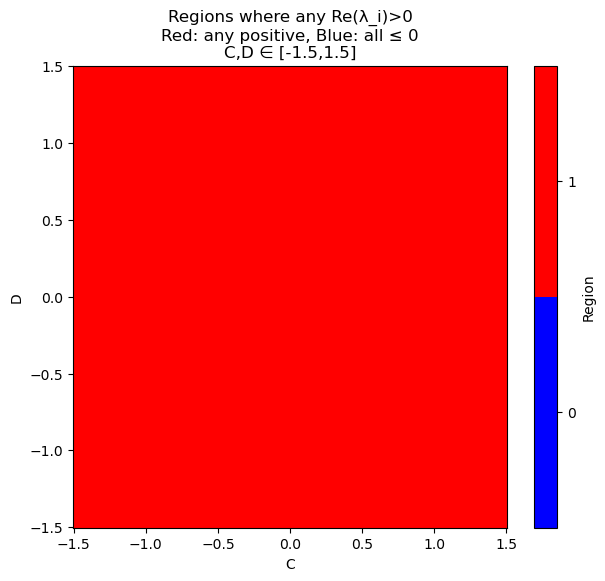

In [79]:
# Fixed parameter
A = -1

# Grid for C and D
C_vals = np.linspace(-1.5, 1.5, 400)
D_vals = np.linspace(-1.5, 1.5, 400)
C, D = np.meshgrid(C_vals, D_vals)

# Avoid singularity where denominator is zero
den = 12 * (2*C + D)
valid = np.abs(den) > 1e-6

# Compute discriminant inside sqrt
disc = 25*C**2 + 28*C*D + 8*D**2
sqrt_disc = np.sqrt(disc)

# Compute eigenvalues λ1 and λ2
num1 = A * (-5*C - 2*D - sqrt_disc)
num2 = A * (-5*C - 2*D + sqrt_disc)
lambda1 = np.zeros_like(C, dtype=complex)
lambda2 = np.zeros_like(C, dtype=complex)
lambda1[valid] = num1[valid] / den[valid]
lambda2[valid] = num2[valid] / den[valid]

# Determine mask: red if any Re(λ) > 0, blue otherwise
mask = np.zeros_like(C, dtype=int)  # 0->blue, 1->red
mask[(np.real(lambda1) > 0) | (np.real(lambda2) > 0)] = 1

# Define colormap: blue for 0, red for 1
cmap = ListedColormap(['blue', 'red'])

# Plot the heatmap
plt.figure(figsize=(7, 6))
plt.pcolormesh(C, D, mask, cmap=cmap, shading='auto')
plt.colorbar(ticks=[0, 1], label='Region')
plt.clim(-0.5, 1.5)
plt.xlabel('C')
plt.ylabel('D')
plt.title('Regions where any Re(λ_i)>0\nRed: any positive, Blue: all ≤ 0\nC,D ∈ [-1.5,1.5]')
plt.show()

# Appendix 
## A1. Real Hessian in $z,z^{*}$
Let
$$
u = \begin{pmatrix}x\\y\end{pmatrix}, 
\quad
v = \begin{pmatrix}z\\\ z^{*}\end{pmatrix},
$$
with
$$
z = x + i\,y,
\quad
 z^{*} = x - i\,y.
$$

Then the change‐of‐variables matrix and its Hermitian adjoint are
$$
T = \frac12
\begin{pmatrix}
1 & 1\\[6pt]
-\,i & i
\end{pmatrix},
\qquad
T^* = \overline{T}^{\,T}
= \frac12
\begin{pmatrix}
1 & i\\[6pt]
1 & -\,i
\end{pmatrix}.
$$

If the real–variable Hessian is
$$
H_{(x,y)} =
\begin{pmatrix}
f_{xx} & f_{xy}\\[6pt]
f_{yx} & f_{yy}
\end{pmatrix},
$$
then in the $(z, z^{*})$–coordinates the Hessian transforms as
$$
H_{(z,z^{*})} \;=\;T^*\,H_{(x,y)}\,T.
$$

Carrying out the block‐multiplication gives
\begin{align*}
H_{zz}
&=\frac{1}{4}\bigl(f_{xx}+f_{yy}\bigr),\\[6pt]
H_{z z^{*}}
&=\frac{1}{4}\bigl(f_{xx}-f_{yy}+2\,i\,f_{xy}\bigr),\\[6pt]
H_{ z^{*} z}
&=\frac{1}{4}\bigl(f_{xx}-f_{yy}-2\,i\,f_{xy}\bigr),\\[6pt]
H_{ z^{*} z^{*}}
&=\frac{1}{4}\bigl(f_{xx}+f_{yy}\bigr).
\end{align*}

Hence
$$
H_{(z, z^{*})}
=\frac14
\begin{pmatrix}
f_{xx}+f_{yy} & f_{xx}-f_{yy}+2\,i\,f_{xy}\\[6pt]
f_{xx}-f_{yy}-2\,i\,f_{xy} & f_{xx}+f_{yy}
\end{pmatrix} = \begin{pmatrix}
 f_{zz^{*}} & f_{z^{*}z^{*}}\\
          f_{zz} & f_{z^{*}z}
\end{pmatrix}  .
$$
